# 7. Machine Learning and Feature Extraction
---

### 7.1. Introduction and Fundamental ML Approaches

#### 7.1.1. Introduction and Definitions
* **Artificial Intelligence (AI):** The capability of a non-natural system to think, learn from experience, make decisions, and perform tasks traditionally associated with human intelligence.
* **Machine Learning (ML) Definition (Tom Mitchell, 1997):** A computer program learns from experience $\mathbf{E}$ with respect to task $\mathbf{T}$ and performance measure $\mathbf{P}$, if its performance at $\mathbf{T}$, as measured by $\mathbf{P}$, improves with $\mathbf{E}$.
    * **Key Pillars:** **Experience ($\mathbf{E}$)**, **Task ($\mathbf{T}$)**, **Performance Measure ($\mathbf{P}$)**.
* **Generalization:** The core challenge of ML; the system must accurately estimate the output for unseen input data.

#### 7.1.2. Fundamental ML Approaches
* **Supervised Learning:** Training data includes **labels** ($\mathbf{x} \rightarrow \mathbf{y}$).
    * **Classification:** Discrete output (e.g., healthy/diseased).
    * **Regression:** Continuous output (e.g., estimating age).
* **Unsupervised Learning:** Training data is **unlabeled**. Goal is to find hidden structure or clusters.
* **Semi-Supervised Learning:** Very few labeled samples exist.
* **Reinforcement Learning:** An agent learns by interacting with an environment, receiving rewards for beneficial actions.

---

### 7.2. Classification Concepts and Model Fitness

#### 7.2.1. Data and Features
* **Raw Data:** The original time-series signal (used in Deep Learning).
* **Feature Extraction:** The process of converting high-volume raw data into **low-dimensional, informative numerical values** (features) that describe the signal's core properties (e.g., power, variance).
* **Ideal Feature Vector:** Low intra-class scatter (vectors within a class are close) and high inter-class scatter (vectors between classes are far apart).

#### 7.2.2. The Classification Process
The process consists of two fundamental phases:
1.  **Classifier Design (Training Phase):** Determining the boundaries or regions for each class in the feature space.
2.  **System Evaluation (Test Phase):** Labeling unseen data and assessing performance.
* **Key Steps:** Measurement $\rightarrow$ **Feature Extraction** $\rightarrow$ Dimension Reduction $\rightarrow$ Classifier Design $\rightarrow$ Decision.

#### 7.2.3. Model Fitness, Normalization, and Regularization
* **Model Fitness States:**
    * **Appropriate Fit:** Model generalizes well to new data.
    * **Underfitting (Too Simple):** Model fails to capture the relationship even in training data.
    * **Overfitting (Too Complex):** Model perfectly memorizes training data (including noise) but fails on test data.
* **Normalization/Scaling:** Necessary when feature dimensions have different scales or ranges, preventing features with large magnitudes from dominating the classifier.
* **Regularization:** Techniques used to penalize model complexity, explicitly preventing overfitting.

---

### 7.3. Performance Evaluation

#### 7.3.1. Data Splitting and Cross-Validation
* **Data Splits:** Labeled data must be partitioned:
    1.  **Training Set:** For designing the classifier.
    2.  **Validation Set:** For tuning fixed parameters (hyperparameters) or selecting features.
    3.  **Test Set:** For final, unbiased evaluation of the trained system.
* **Cross-Validation (CV):** Repetitive splitting of the labeled data to increase confidence in the test results.
    * **k-Fold CV:** Data is split into $k$ folds; model is trained $k$ times, each time using a different fold as the test set.
    * **Leave-One-Out (LOO):** Useful when the labeled dataset is very small.
* **Critical Rule:** The **Test Set** must not influence the model in any part of the training or parameter selection phase.

#### 7.3.2. Evaluation Metrics (Confusion Matrix)
| Actual Label | Class 1 (Positive) | Class 2 (Negative) |
| :--- | :--- | :--- |
| **Predicted Label** | **TP** (True Positive) | **FP** (False Positive) |
| **Class 2 (Negative)** | **FN** (False Negative) | **TN** (True Negative) |

* **Classification Accuracy (Multiclass/Overall):** The fraction of correctly classified samples.
    $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
* **Sensitivity (Recall):** The ability to correctly detect positive cases (True Positive Rate).
    $$Sensitivity = \frac{TP}{TP + FN}$$
* **Specificity:** The ability to correctly reject negative cases (True Negative Rate).
    $$Specificity = \frac{TN}{TN + FP}$$

---

### 7.4. Feature Extraction for EEG Signals

Features are broadly categorized by the domain in which they are calculated:

#### 7.4.1. Time Domain Features
* **Statistical Moments:** **Mean**, **Variance** (spread), **Skewness** (asymmetry around the mean), and **Kurtosis** (peakedness/heaviness of tails).
* **Hjorth Parameters:**
    * **Activity:** Variance of the signal ($\text{Var}\{x(t)\}$).
    * **Mobility:** Ratio of the variance of the first derivative to the variance of the signal ($\frac{\text{Var}\{x'(t)\}}{\text{Var}\{x(t)\}}$).
    * **Complexity:** Ratio of the Mobility of the first derivative to the Mobility of the signal.

#### 7.4.2. Frequency Domain Features
* **Power Bands:** Calculated using the Power Spectral Density (PSD). The signal's total power is integrated within fixed frequency bands:
    * **Delta:** 0.5–4 Hz
    * **Theta:** 4–8 Hz
    * **Alpha:** 8–13 Hz
    * **Beta:** 13–30 Hz
* **Ratios:** The ratio of power between different bands (e.g., $\frac{\text{Theta Power}}{\text{Alpha Power}}$) often serves as a strong differentiating feature.

#### 7.4.3. Time-Frequency Domain Features
* **Transformation:** Achieved via Short-Time Fourier Transform (STFT) (Spectrogram) or **Discrete Wavelet Transform (DWT)**.
* **DWT Features:** Energy or statistical features calculated directly from the **Detail and Approximation Coefficients** at various decomposition levels.

#### 7.4.4. Model-Based and Advanced Features
* **Parametric Model Features:** Using the estimated coefficients of the **AR model** ($\mathbf{a_k}$) and the white noise variance ($\mathbf{\sigma_u^2}$) as features.
* **Non-linear/Chaos Features:**
    * **Lyapunov Exponent:** Measures the rate of separation of nearby trajectories.
    * **Fractal Dimension** and **Correlation Dimension**.
    * **Entropy Measures:** Approximate Entropy (ApEn), Sample Entropy (SampEn) for quantifying signal complexity.
* **Spatial/Multichannel Features:**
    * **Common Spatial Pattern (CSP):** A spatial filtering technique used primarily for **two-class classification** (e.g., motor imagery).
    * **CSP Feature:** The **log-variance** of the signal after being projected onto the optimized spatial filter weights.
    * **Connectomic/Graph Features:** Metrics derived from brain connectivity (e.g., Coherence, Phase Locking Value) are used to build graphs, and graph metrics (like efficiency) become features.
## Code Example: EEG Feature Extraction and Classification
This script uses numpy for data simulation and feature extraction, and scikit-learn for classification and evaluation.


Original Data Shape: (200, 250)
Feature Vector Shape: (200, 2)

--- CLASSIFICATION RESULTS ---
Classifier Used: Support Vector Machine (SVM)
Classification Accuracy: 1.0000
Confusion Matrix:
 [[31  0]
 [ 0 29]]


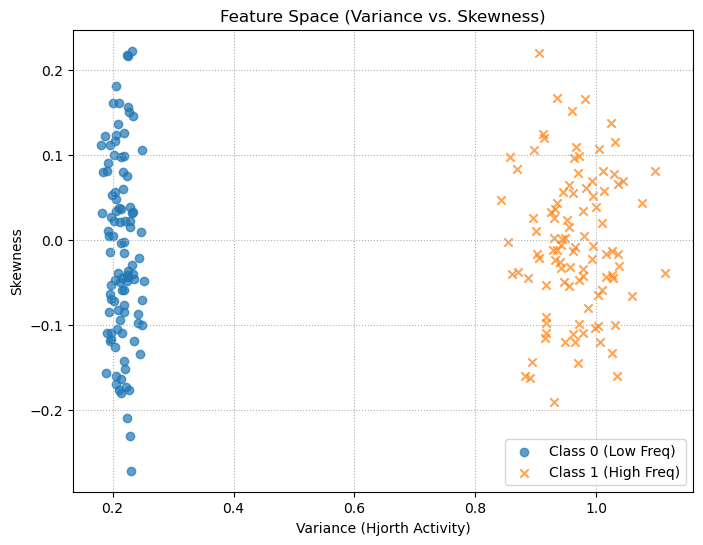

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Data Simulation
fs = 250        # Sampling frequency
epoch_len = 1   # 1 second epoch
num_epochs = 200 # Total samples (100 per class)
time_points = fs * epoch_len
t = np.linspace(0, epoch_len, time_points, endpoint=False)

# Class 0: Low-Frequency Dominant (e.g., Relaxation/Sleep)
# Mean frequency around 5 Hz (Theta)
eeg_class0 = np.array([
    0.5 * np.sin(2 * np.pi * 5 * t + np.random.rand()) + 0.3 * np.random.randn(time_points)
    for _ in range(num_epochs // 2)
])

# Class 1: High-Frequency Dominant (e.g., Task Engagement)
# Mean frequency around 20 Hz (Beta)
eeg_class1 = np.array([
    1.2 * np.sin(2 * np.pi * 20 * t + np.random.rand()) + 0.5 * np.random.randn(time_points)
    for _ in range(num_epochs // 2)
])

# Combine data and labels
X_data = np.vstack([eeg_class0, eeg_class1])
y_labels = np.hstack([np.zeros(num_epochs // 2), np.ones(num_epochs // 2)])

# 2. Feature Extraction
# Feature 1: Variance _activity
# Feature 2: Skewness 
def extract_features(data):
    features = []
    for epoch in data:
        variance = np.var(epoch)         # Corresponds to Hjorth Activity
        skewness = np.mean(((epoch - np.mean(epoch)) / np.std(epoch))**3)
        features.append([variance, skewness])
    return np.array(features)

X_features = extract_features(X_data)
print(f"Original Data Shape: {X_data.shape}")
print(f"Feature Vector Shape: {X_features.shape}\n")
# 3. Model Training 
# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.3, random_state=42
)

# Initialize and Train the Support Vector Machine (SVM) Classifier
classifier = SVC(kernel='linear', C=1.0, random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# 4.Results and Evaluation

accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("--- CLASSIFICATION RESULTS ---")
print(f"Classifier Used: Support Vector Machine (SVM)")
print(f"Classification Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_mat)

# Visualization of the Features
plt.figure(figsize=(8, 6))
plt.scatter(X_features[y_labels == 0, 0], X_features[y_labels == 0, 1], label='Class 0 (Low Freq)', alpha=0.7, marker='o')
plt.scatter(X_features[y_labels == 1, 0], X_features[y_labels == 1, 1], label='Class 1 (High Freq)', alpha=0.7, marker='x')
plt.title('Feature Space (Variance vs. Skewness)')
plt.xlabel('Variance (Hjorth Activity)')
plt.ylabel('Skewness')
plt.legend()
plt.grid(True, linestyle=':')
plt.show()